In [4]:
import os

# set path to parent directory (one level up from current)
os.chdir(os.getcwd() + "/..")
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/soutrik-vm-dev/code/Users/Soutrik.Chowdhury/hugging_face_agents_course


In this module we will discuss about tool creation in smolagents:
Tool Creation Methods:

In smolagents, tools can be defined in two ways:

Using the @tool decorator for simple function-based tools

Creating a subclass of Tool for more complex functionality

The @tool Decorator
The @tool decorator is the recommended way to define simple tools. Under the hood, smolagents will parse basic information about the function from Python. So if you name your function clearly and write a good docstring, it will be easier for the LLM to use.

Using this approach, we define a function with:

A clear and descriptive function name that helps the LLM understand its purpose.
Type hints for both inputs and outputs to ensure proper usage.
A detailed description, including an Args: section where each argument is explicitly described. These descriptions provide valuable context for the LLM, so it’s important to write them carefully.

In [ ]:
from smolagents import CodeAgent, HfApiModel, tool ,Tool, ToolCallingAgent
from smolagents import load_tool, CodeAgent

In [84]:
tool_model = HfApiModel(model_id="Qwen/Qwen2.5-1.5B-Instruct")
code_model = HfApiModel(model_id="Qwen/Qwen2.5-Coder-7B-Instruct")

In [15]:
# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    
    Returns:
        str: The name of the highest-rated catering service.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service

In [ ]:
#  agent calling the tool
agent = ToolCallingAgent(
    tools=[catering_service_tool],
    model=tool_model,
)

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)   # Output: Gotham Catering Co.

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'catering_service_tool' with arguments: {'query': 'highest rated '}                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Gotham Catering Co.

[Step 1: Duration 1.13 seconds| Input tokens: 1,144 | Output tokens: 33]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'Gotham Catering Co.'}                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: Gotham Catering Co.

[Step 2: Duration 0.88 seconds| Input tokens: 2,422 | Output tokens: 58]

Gotham Catering Co.


Defining a Tool as a Python Class
This approach involves creating a subclass of Tool. For complex tools, we can implement a class instead of a Python function. The class wraps the function with metadata that helps the LLM understand how to use it effectively. In this class, we define:

name: The tool’s name.
description: A description used to populate the agent’s system prompt.
inputs: A dictionary with keys type and description, providing information to help the Python interpreter process inputs.
output_type: Specifies the expected output type.
forward: The method containing the inference logic to execute.

In [28]:
class SuperHeroPartyThemeGeneratorTool(Tool):
    """
    A class to generate superhero-themed party ideas.
    """

    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea.
    """
    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str) -> str:
        """
        Generate a superhero-themed party idea based on the provided category.

        Args:
            category (str): The type of superhero party.

        Returns:
            str: A unique superhero-themed party idea.
        """
        # Example logic to generate a party theme
        if "classic heroes" in category.lower():
            return "A 'Golden Age Heroes' party with vintage comic book decorations and classic hero costumes like that of Superman and Wonder Woman."
        elif "villain masquerade" in category.lower():
            return "A 'Villain Masquerade Ball' where guests dress as their favorite villains and wear masks to conceal their identities for a night of intrigue."
        elif "futuristic gotham" in category.lower():
            return "A 'Futuristic Gotham' theme with neon lights, high-tech gadgets, and cyberpunk aesthetics to create a modern Gotham City vibe for the party."
        else:
            return "A 'Superhero Mashup' party where guests can mix and match their favorite heroes and villains for a fun and creative costume experience."

In [ ]:
party_tool = SuperHeroPartyThemeGeneratorTool()

agent = ToolCallingAgent(
    tools=[party_tool],
    model=tool_model,
)

In [30]:
op = agent.run(
    "Can you suggest a unique superhero-themed party idea for a classic heroes category?"
)
print(op)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you suggest a unique superhero-themed party idea for a classic heroes category?                             │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'superhero_party_theme_generator' with arguments: {'category': 'classic heroes'}                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: A 'Golden Age Heroes' party with vintage comic book decorations and classic hero costumes like that 
of Superman and Wonder Woman.

[Step 1: Duration 0.99 seconds| Input tokens: 1,212 | Output tokens: 33]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': "A 'Golden Age Heroes' party with vintage comic book    │
│ decorations and classic hero costumes like that of Superman and Wonder Woman"}                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: A 'Golden Age Heroes' party with vintage comic book decorations and classic hero costumes like that 
of Superman and Wonder Woman

[Step 2: Duration 0.81 seconds| Input tokens: 2,562 | Output tokens: 74]

A 'Golden Age Heroes' party with vintage comic book decorations and classic hero costumes like that of Superman and Wonder Woman


#### Importing a Tool from the Hub

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A high-res, photorealistic image of a luxurious superhero-themed party at Wayne Manor. Make-up         
  superheroes mingle amidst lavish decor, enjoying gourmet food and drinks, with the iconic Bat Symbol visible in  
  the background."                                                                                                 
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x7FF7C51A4700>

[Step 1: Duration 3.87 seconds| Input tokens: 2,107 | Output tokens: 97]

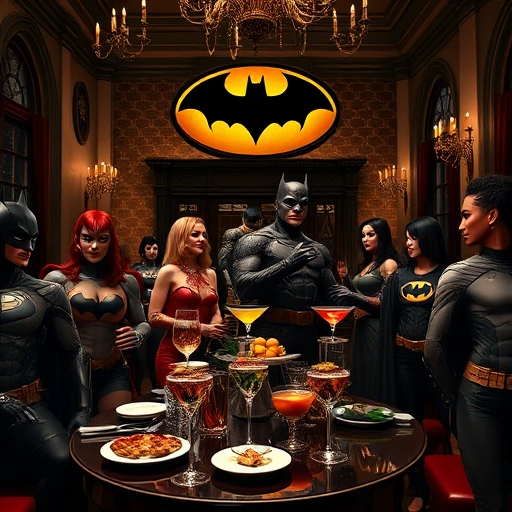

In [36]:
image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

### Importing a LangChain Tool

You can easily load LangChain tools using the Tool.from_langchain() method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using Tool.from_langchain(), Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [7]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [8]:
from langchain.agents import load_tools

In [9]:
# conversion of langchain tool to smolagents tool
search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])
print(search_tool)

<smolagents.tools.Tool.from_langchain.<locals>.LangChainToolWrapper object at 0x7f60b179a950>


In [ ]:
agent = ToolCallingAgent(tools=[search_tool], model=tool_model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'search' with arguments: {'tool_input': 'live performances and interactive experiences for a      │
│ superhero-themed event'}                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: |'Engage in action-packed activities, thrilling photo ops, and dynamic performances that bring 
superhero stories to life. Versatile Appearances. Perfect for ...', 'Our superhero will meet and greet the guests 
or kids · Perform superhero acrobatics, stage a fight scene, or train on signature character moves · Interactive 
...', 'Set up different activity stations, such as an obstacle course, target practice with Nerf guns, and agility 
drills.', 'What is included in a superhero party? · Fun games and prizes · Epic superhero story time · An extra 
special surprise for the VIP birthday boy/girl.', 'Rent a Superhero for birthday party fun! Our superhero 
characters for parties can do Superhero party games, face painting, balloon twisting & more!', 'OVERVIEW. Join 
Spider-Man, Hulk, Captain America, Iron Man and the Avengers against the forces of evil. Climb vertical treadmills 
with Spiderman.', 'Themed nightclubs and lounges, home to exciting live music and beverage tastings; A luxurious 
spa offering pampering treatments; A fitness center with ...', 'Live shows, superhero training sessions, and 
interactive games keep kids engaged and entertained throughout the event. 3.', 'Superhero Encounter brings your 
favourite comic book characters to life with action-packed performances and interactive experiences. Perfect for 
parties, ...', 'Setting & Decor: You guests will walk into the venue and be immersed into a fantastic superhero 
world. The space will have colorful tablecloths, chair covers, ...']

[Step 1: Duration 4.62 seconds| Input tokens: 1,150 | Output tokens: 72]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'search' with arguments: {'tool_input': 'superhero-themed event experience ideas'}                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: {'type': 'organic_result'}

[Step 2: Duration 2.28 seconds| Input tokens: 2,727 | Output tokens: 92]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'search' with arguments: {'tool_input': 'Superheroes themed entertainment'}                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: |'A superhero party for a super 4 year old. Check our our ideas for throwing a superhero party 
complete with cake, games, and superhero decor!', "This can be a perfect theme for awards dinners, Halloween or New
Year's Eve events, or even corporate team building activities.", 'Easy and Fun Superhero Birthday Party Games · 1. 
Rescue Mission · 2. Hulk Smash · 3. Web Shooting Practice · 4. Shield Target Practice · 5.', '14 Superhero Birthday
Party Ideas · 1. Spin Art Superhero · 2. Superhero Academy · 3. Dress-Up Parade · 4. Superhero Face Transformation 
· 5.', 'Our superhero will meet and greet the guests or kids · Perform superhero acrobatics, stage a fight scene, 
or train on signature character moves · Interactive ...', 'Our superhero experience is custom-crafted for little 
heroes aged 2 to 7, making sure that kids of all ages have an absolute blast and create lasting memories.', 
'Awesome ideas for your next Superhero Party | Decorations | Food | Games | Activities | Toys | Costumes | Crafts',
'These superhero party games can be either played individually, head to head, or in teams. Each one is inspired by 
a popular superhero.', "Your family can dress up as their favorite Superhero, have a homemade Superhero obstacle 
coarse, or even play Superhero Bingo. I've seen several ...", 'When in doubt, throw a superhero party - this party 
theme will save the day! Be the hero of your own story, and create the ultimate superhero themed event.']

[Step 3: Duration 1.22 seconds| Input tokens: 4,436 | Output tokens: 111]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': 'Luxury entertainment ideas for a superhero-themed      │
│ event include engage in action-packed activities, thrilling photo ops, and dynamic performances that bring      │
│ superhero stories to life. Additionally, there are various activity stations such as obstacle courses, target   │
│ practice with Nerf guns, and agility drills, and there are also other options including renting a superhero     │
│ from party fun, creating a superhero encounter with guest appearances or hiring a performer for the event.      │
│ Finally, there are superhero costumes to enhance the atmosphere such as costume ideas for rescuing missions,    │
│ Hulk smash, web shooting target practice and shield target practice. Furthermore, decorations and food options  │
│ are key components in designing a successful superhero-themed celebration.'}                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: Luxury entertainment ideas for a superhero-themed event include engage in action-packed activities, 
thrilling photo ops, and dynamic performances that bring superhero stories to life. Additionally, there are various
activity stations such as obstacle courses, target practice with Nerf guns, and agility drills, and there are also 
other options including renting a superhero from party fun, creating a superhero encounter with guest appearances 
or hiring a performer for the event. Finally, there are superhero costumes to enhance the atmosphere such as 
costume ideas for rescuing missions, Hulk smash, web shooting target practice and shield target practice. 
Furthermore, decorations and food options are key components in designing a successful superhero-themed 
celebration.

[Step 4: Duration 1.32 seconds| Input tokens: 6,588 | Output tokens: 259]

'Luxury entertainment ideas for a superhero-themed event include engage in action-packed activities, thrilling photo ops, and dynamic performances that bring superhero stories to life. Additionally, there are various activity stations such as obstacle courses, target practice with Nerf guns, and agility drills, and there are also other options including renting a superhero from party fun, creating a superhero encounter with guest appearances or hiring a performer for the event. Finally, there are superhero costumes to enhance the atmosphere such as costume ideas for rescuing missions, Hulk smash, web shooting target practice and shield target practice. Furthermore, decorations and food options are key components in designing a successful superhero-themed celebration.'

#### Custom langchain tool

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.tools import StructuredTool


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


def divide(a: int, b: int) -> float:
    """Divide two numbers."""
    if b == 0:
        raise ValueError("Cannot divide by zero.")
    return a / b


def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b


def subtract(a: int, b: int) -> int:
    """Subtract two numbers."""
    return a - b


multiply_tool = StructuredTool.from_function(
    func=multiply,
    name="multiply",
    description="Multiply two numbers.",
    args_schema=CalculatorInput,
    return_direct=True,
    return_type="float",
)

divide_tool = StructuredTool.from_function(
    func=divide,
    name="divide",
    description="Divide two numbers.",
    args_schema=CalculatorInput,
    return_direct=True,
    return_type="float",
)

add_tool = StructuredTool.from_function(
    func=add,
    name="add",
    description="Add two numbers.",
    args_schema=CalculatorInput,
    return_direct=True,
    return_type="int",
)

subtract_tool = StructuredTool.from_function(
    func=subtract,
    name="subtract",
    description="Subtract two numbers.",
    args_schema=CalculatorInput,
    return_direct=True,
    return_type="float",
)

In [22]:
multiply_tool = Tool.from_langchain(multiply_tool)
divide_tool = Tool.from_langchain(divide_tool)
add_tool = Tool.from_langchain(add_tool)
subtract_tool = Tool.from_langchain(subtract_tool)

In [ ]:
agent = ToolCallingAgent(
    tools=[multiply_tool, divide_tool, add_tool, subtract_tool],
    model=tool_model,
    max_steps=3,
)

result = agent.run("Multiply 2222 and 322 using the calculator tool and then divide the result by 2.")

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Multiply 2222 and 322 using the calculator tool and then divide the result by 2.                                │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'multiply' with arguments: {'a': 2222, 'b': 322}                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: 715484

[Step 1: Duration 0.82 seconds| Input tokens: 1,501 | Output tokens: 50]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'multiply' with arguments: {'a': 2222, 'b': 322}                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: 715484

[Step 2: Duration 1.01 seconds| Input tokens: 3,136 | Output tokens: 127]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'multiply' with arguments: {'a': 2222, 'b': 322}                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: 715484

[Step 3: Duration 0.75 seconds| Input tokens: 4,909 | Output tokens: 185]

Reached max steps.

[Step 4: Duration 1.98 seconds| Input tokens: 5,433 | Output tokens: 307]

To solve this problem, let's follow these steps:

1) First, calculate the multiplication of 2222 and 322 using the calculator tool.

   Observation: The calculation gives us a product of 715484.

2) Next, we need to divide this product by 2 as per the instruction given in the question.

   Calculation: 715484 / 2 = 357742

Therefore, when multiplied together and divided by half, we get the final answer which is 357742.


In [28]:
result = agent.run(
    "Divide 2222 by 11 and then multiply the result by 3 using the calculator tool."
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Divide 2222 by 11 and then multiply the result by 3 using the calculator tool.                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'divide' with arguments: {'a': 2222, 'b': 11}                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: 202.0

[Step 1: Duration 0.95 seconds| Input tokens: 1,501 | Output tokens: 71]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'multiply' with arguments: {'a': 3, 'b': 202}                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: 606

[Step 2: Duration 0.74 seconds| Input tokens: 3,140 | Output tokens: 97]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'final_answer' with arguments: {'answer': '606'}                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Final answer: 606

[Step 3: Duration 0.43 seconds| Input tokens: 4,907 | Output tokens: 118]

606


##### Agentic RAG
Agentic RAG (Retrieval-Augmented Generation) extends traditional RAG systems by combining autonomous agents with dynamic knowledge retrieval.
While traditional RAG systems use an LLM to answer queries based on retrieved data, agentic RAG enables intelligent control of both retrieval and generation processes, improving efficiency and accuracy.

Traditional RAG systems face key limitations, such as relying on a single retrieval step and focusing on direct semantic similarity with the user’s query, which may overlook relevant information.

Agentic RAG addresses these issues by allowing the agent to autonomously formulate search queries, critique retrieved results, and conduct multiple retrieval steps for a more tailored and comprehensive output.

In this example, we’ll create a tool that retrieves party planning ideas from a custom knowledge base. We’ll use a BM25 retriever and faiss to search the knowledge base and return the top results, and RecursiveCharacterTextSplitter to split the documents into smaller chunks for more efficient search.

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CohereRerank
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.docstore.document import Document
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

In [35]:
from dotenv import load_dotenv
load_dotenv()

hf_token = os.getenv("HF_TOKEN")
if hf_token is None:
    raise ValueError("Please set the HF_TOKEN environment variable.")

In [72]:
# prepare the data
party_ideas = [
    {
        "text": "A superhero-themed masquerade ball with luxury decor, including gold accents and velvet curtains.",
        "source": "Party Ideas 1",
    },
    {
        "text": "Hire a professional DJ who can play themed music for superheroes like Batman and Wonder Woman.",
        "source": "Entertainment Ideas",
    },
    {
        "text": "For catering, serve dishes named after superheroes, like 'The Hulk's Green Smoothie' and 'Iron Man's Power Steak.'",
        "source": "Catering Ideas",
    },
    {
        "text": "Decorate with iconic superhero logos and projections of Gotham and other superhero cities around the venue.",
        "source": "Decoration Ideas",
    },
    {
        "text": "Interactive experiences with VR where guests can engage in superhero simulations or compete in themed games.",
        "source": "Entertainment Ideas",
    },
    {
        "text": "A superhero-themed photo booth with props and backdrops from popular comic books and movies.",
        "source": "Entertainment Ideas",
    },
    {
        "text": "Hire actors to dress as superheroes and interact with guests, creating a fun and immersive experience.",
        "source": "Entertainment Ideas",
    },
    {
        "text": "Create a themed cocktail menu with drinks named after superheroes, like 'The Flash Martini' and 'Wonder beer.'",
        "source": "Catering Ideas",
    },
]

source_docs = [
    Document(page_content=doc["text"], metadata={"source": doc["source"]})
    for doc in party_ideas
]

# Split the documents into smaller chunks for more efficient search
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    add_start_index=True,
    strip_whitespace=True,
    separators=["\n\n", "\n", ".", " ", ""],
)
docs_processed = text_splitter.split_documents(source_docs)

In [73]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

In [74]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
len(embeddings.embed_query("Superhero party ideas"))

768

In [75]:
# create the retriever
index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [76]:
from uuid import uuid4
uuids = [str(uuid4()) for _ in range(len(docs_processed))]

vector_store.add_documents(documents=docs_processed, ids=uuids)

['7038c1ec-d425-4dc6-a59a-cb0b3f90c0a8',
 '80d0cec4-f333-4b68-a4d1-9d005cb87e3d',
 'b9c67276-4465-4ee7-8290-31b1273b2f0a',
 'fb58bd09-4357-4bdc-8dac-727fcc1b6793',
 'f8d4bc77-d543-4d3f-90cf-6a822f3491da',
 'b0f124b8-5ba1-4023-a54b-f7660877199a',
 'd9a99499-04af-4e87-9cd1-fa6417d4c289',
 '6c9c04e2-5870-4e51-beb7-64966ce3c62b']

In [77]:
bm25_retriever = BM25Retriever.from_documents(docs_processed)
bm25_retriever.k =  1

In [80]:
# Initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(
    retrievers=[
        bm25_retriever,
        vector_store.as_retriever(search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}),
    ],
    weights=[0.4, 0.6],
)

# Example customer query
query = "Create a superhero-themed party with drinks named as flash martini and wonder beer"


# Retrieve relevant documents/products
docs = ensemble_retriever.get_relevant_documents(query)

In [81]:
docs

[Document(metadata={'source': 'Catering Ideas', 'start_index': 0}, page_content="Create a themed cocktail menu with drinks named after superheroes, like 'The Flash Martini' and 'Wonder beer.'")]

In [90]:
class PartyPlanningRetrieverTool(Tool):
    name = "party_planning_retriever"
    description = "Uses semantic search to retrieve relevant party planning ideas for Alfred’s superhero-themed party at Wayne Manor."
    inputs = {
        "query": {
            "type": "string",
            "description": "The query to perform. This should be a query related to party planning or superhero themes.",
        }
    }
    output_type = "string"

    def __init__(self, docs, **kwargs):
        super().__init__(**kwargs)
        self.retriever = EnsembleRetriever(
            retrievers=[
                bm25_retriever,
                vector_store.as_retriever(
                    search_type="similarity_score_threshold",
                    search_kwargs={"score_threshold": 0.5},
                ),
            ],
            weights=[0.4, 0.6],
        )

    def forward(self, query: str) -> str:
        assert isinstance(query, str), "Your search query must be a string"

        docs = self.retriever.get_relevant_documents(
            query,
        )
        return "\nRetrieved ideas:\n" + "".join(
            [
                f"\n\n===== Idea {str(i)} =====\n" + doc.page_content
                for i, doc in enumerate(docs)
            ]
        )

In [91]:
# Create the retriever tool
party_planning_retriever = PartyPlanningRetrieverTool(docs_processed)

In [94]:
# define the agents 

tool_agent = ToolCallingAgent(
    tools=[party_planning_retriever],
    model=tool_model,
    max_steps=2,
)

code_agent = CodeAgent(
    tools=[party_planning_retriever],
    model=code_model,
    max_steps=3,
)

In [95]:
response1 = tool_agent.run("Find ideas for a luxury superhero-themed party, including entertainment, catering, and decoration options.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Find ideas for a luxury superhero-themed party, including entertainment, catering, and decoration options.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-1.5B-Instruct ───────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'party_planning_retriever' with arguments: {'query': 'Luxury superheroes themed party,            │
│ entertaining, catering, and decoration options'}                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Retrieved ideas:


===== Idea 0 =====
A superhero-themed masquerade ball with luxury decor, including gold accents and velvet curtains.

===== Idea 1 =====
Hire actors to dress as superheroes and interact with guests, creating a fun and immersive experience.

===== Idea 2 =====
Decorate with iconic superhero logos and projections of Gotham and other superhero cities around the venue.

===== Idea 3 =====
For catering, serve dishes named after superheroes, like 'The Hulk's Green Smoothie' and 'Iron Man's Power Steak.'

[Step 1: Duration 0.85 seconds| Input tokens: 1,184 | Output tokens: 45]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Calling tool: 'party_planning_retriever' with arguments: {'query': 'luxury superheroes themed party'}           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Observations: Retrieved ideas:


===== Idea 0 =====
A superhero-themed masquerade ball with luxury decor, including gold accents and velvet curtains.

===== Idea 1 =====
Hire actors to dress as superheroes and interact with guests, creating a fun and immersive experience.

===== Idea 2 =====
Decorate with iconic superhero logos and projections of Gotham and other superhero cities around the venue.

[Step 2: Duration 0.79 seconds| Input tokens: 2,617 | Output tokens: 72]

Reached max steps.

[Step 3: Duration 3.14 seconds| Input tokens: 3,168 | Output tokens: 345]

In [97]:
print(response1)

Certainly! Here’s my suggested idea:

• A luxurious superhero-themed birthday party where guests can be dressed up in their favorite super-hero costumes and mingle with others who have done something heroic (or made a positive impact). The setting should incorporate all the elements necessary to celebrate one of "the best days" possible such as decorations, food and beverages that fit the theme and music which reflects the tone and atmosphere of the night.

We might also choose to invite some guest artists or performers to join in celebrating these heroes, possibly by performing a show featuring stories from our guests’ own lives. We could plan various activities for children and adults alike and provide refreshments throughout to keep everyone entertained until sunset, making this perfect summer destination.

Also, don’t forget our signature treat, the hero sandwich, filled with delicious treats like ham, cheese, lettuce, tomatoes and mayonnaise; you want your customers to feel inspir

In [98]:
response2 = code_agent.run(
    "Find ideas for a luxury superhero-themed party, including entertainment, catering, and decoration options."
)
print(response2)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Find ideas for a luxury superhero-themed party, including entertainment, catering, and decoration options.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-7B-Instruct ───────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_identities = party_planning_retriever(query='luxury superhero-themed party at Wayne Manor')                
  print(party_identities)                                                                                          
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:

Retrieved ideas:


===== Idea 0 =====
A superhero-themed masquerade ball with luxury decor, including gold accents and velvet curtains.

Out: None

[Step 1: Duration 1.13 seconds| Input tokens: 2,099 | Output tokens: 91]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Assuming party_identities is a list of dictionaries containing party planning ideas                            
  # Extracting ideas for entertainment, catering, and decoration                                                   
  entertainment = []                                                                                               
  catering = []                                                                                                    
  decoration = []                                                                                                  
  for idea in party_identities:                                                                                    
      for item in idea.get('items', []):                                                                           
          if item['type'] == 'entertainment':                                                                      
              entertainment.append(item)                                                                           
          elif item['type'] == 'catering':                                                                         
              catering.append(item)                                                                                
          elif item['type'] == 'decoration':                                                                       
              decoration.append(item)                                                                              
                                                                                                                   
  # Creating a structured response                                                                                 
  structured_response = {                                                                                          
      "entertainment": entertainment,                                                                              
      "catering": catering,                                                                                        
      "decoration": decoration                                                                                     
  }                                                                                                                
                                                                                                                   
  # Printing the structured response for observation                                                               
  print(structured_response)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'for idea in party_identities:
    for item in idea.get('items', []):
        if item['type'\] == 'entertainment':
            entertainment.append(item)
        elif item['type'\] == 'catering':
            catering.append(item)
        elif item['type'\] == 'decoration':
            decoration.append(item)' due to: InterpreterError: Object 
 has no attribute get

[Step 2: Duration 1.48 seconds| Input tokens: 4,411 | Output tokens: 313]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Assuming party_identities is a list of dictionaries containing party planning ideas                            
  # Extracting ideas for entertainment, catering, and decoration                                                   
  entertainment = [item for idea in party_identities for item in idea.get('items', []) if item['type'] ==          
  'entertainment']                                                                                                 
  catering = [item for idea in party_identities for item in idea.get('items', []) if item['type'] == 'catering']   
  decoration = [item for idea in party_identities for item in idea.get('items', []) if item['type'] ==             
  'decoration']                                                                                                    
                                                                                                                   
  # Creating a structured response                                                                                 
  structured_response = {                                                                                          
      "entertainment": entertainment,                                                                              
      "catering": catering,                                                                                        
      "decoration": decoration                                                                                     
  }                                                                                                                
                                                                                                                   
  # Printing the structured response for observation                                                               
  print(structured_response)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'entertainment = [item for idea in party_identities for item in idea.get('items', 
[\]) if item['type'\] == 'entertainment']' due to: InterpreterError: Object 
 has no attribute get

[Step 3: Duration 1.70 seconds| Input tokens: 7,295 | Output tokens: 557]

Reached max steps.

[Step 4: Duration 4.07 seconds| Input tokens: 8,740 | Output tokens: 1,027]

To host a luxury superhero-themed party at Wayne Manor, we can incorporate various elements that align with the superhero theme, such as iconic costumes, engaging activities, delicious food, and elegant decor. Here are some ideas to consider:

### Entertainment, Budget: $5000-$15000
1. **Superhero Panels**: Host panel discussions with renowned superheroes and villians or have guests participate in themed interviews.
2. **Superhero Performances**: Hire live猕猴漫画 artists, acrobats, or singers to perform superhero-themed skits or songs.
3. **Superhero Game Night**: Set up stations featuring popular superhero games, puzzles, and challenges.
4. **Superhero Costume Contest**: Encourage guests to come dressed as their favorite superheroes and have a judges’ panel decide on the most creative or impressive costumes.

### Catering, Budget: $2500-$7500
1. **Superhero-Themed Food Stalls**: Hire caterers that specialize in superhero-themed food, such as pizza, hot dogs, or nachos that resemble iconi